<a href="https://colab.research.google.com/github/SarahSouzaPontes/banco_Dos_Dados_18.05.2022_Pensionistas_Desigualdades/blob/main/Banco_Dos_Dados_18_05_2022_Pensionistas_Desigualdades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instalação das bibliotecas importantes
!pip install pandas -q
!pip install numpy -q
!pip install sklearn -q
!pip install imblearn -q
!pip install statsmodels -q
!pip install yellowbrick -q
!pip uninstall pandas-profiling -y -q
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
import pandas as pd

     |████████████████████████████████| 21.8 MB 1.8 MB/s 
     |████████████████████████████████| 11.1 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 102 kB 68.7 MB/s 
     |████████████████████████████████| 690 kB 52.5 MB/s 
     |████████████████████████████████| 4.7 MB 34.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 44.8 MB/s 
     |████████████████████████████████| 38.1 MB 103 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
'''Importação dos módulos e funções'''


import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import warnings
import seaborn as sns
import imblearn
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
import missingno as msno
from datetime import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:

'''
Carregando os arquivos .csv como panda dataframe
'''

dataset = pd.read_csv('br_me_pensionistas.csv')

In [8]:
dataset.head()

,ano,mes,nome_servidor,cpf_servidor,data_nascimento_servidor,data_falecimento_servidor,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,...,data_nascimento_beneficiario,sigla_uf_upag_vinculacao,tipo_beneficiario,tipo_pensao,natureza_pensao,data_inicio_beneficio,data_fim_beneficio,rendimento_bruto,rendimento_liquido,pagamento_suspenso
0,1994,10,CAMILO GOMES DA SILVA,***673711**,1914-07-14,1994-08-15,130000000065,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1914-12-14,DF,VIUVA,LEI 8112/90,VITALICIA,1994-08-15,NaN,401.06,401.06,NAO
1,1994,10,CARLOS IVAN VIEIRA,***110331**,1937-08-08,1994-04-04,130000000069,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1935-01-01,DF,VIUVA,LEI 8112/90,VITALICIA,1994-04-04,NaN,3566.22,2856.93,NAO
2,1994,10,JOAO ARAGAO FILHO,***999221**,1926-01-20,1994-03-11,130000000162,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1939-12-13,DF,VIUVA,LEI 8112/90,VITALICIA,1994-03-11,NaN,524.79,524.79,NAO
3,1994,10,MANOEL RODRIGUES MIRANDA,***463351**,1944-01-16,1994-05-17,130000000244,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1940-01-20,DF,VIUVA,LEI 8112/90,VITALICIA,1994-05-18,NaN,101.29,101.29,NAO
4,1994,10,MANOEL RODRIGUES MIRANDA,***463351**,1944-01-16,1994-05-17,130000000244,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1980-05-17,DF,FILHO,LEI 8112/90,TEMPORARIA,1994-05-17,2001-05-17,101.29,101.29,NAO


In [9]:
dataset.describe()

,ano,mes,nome_servidor,cpf_servidor,data_nascimento_servidor,data_falecimento_servidor,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,...,data_nascimento_beneficiario,sigla_uf_upag_vinculacao,tipo_beneficiario,tipo_pensao,natureza_pensao,data_inicio_beneficio,data_fim_beneficio,rendimento_bruto,rendimento_liquido,pagamento_suspenso
count,23748,23748,22282,9243,10887,22282,23748,23748,23748,23748,...,23373,22282,22282,23748,23748,22440,1532,23748,23748,23748
unique,2,3,8269,3265,3891,6267,8472,2,2,2,...,10475,27,32,12,3,5927,751,10112,10138,3
top,1994,12,JOSE DA SILVA,***384294**,1916-06-16,1980-09-29,130000449359,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1932-08-02,RJ,VIUVA,LEI 3373/58 COMBINADA COM 6782/80,VITALICIA,1993-07-01,1997-11-13,0,0,NAO
freq,23747,13747,34,22,39,28,1310,23747,23747,23747,...,12,4281,11286,12046,12055,552,6,355,355,23392


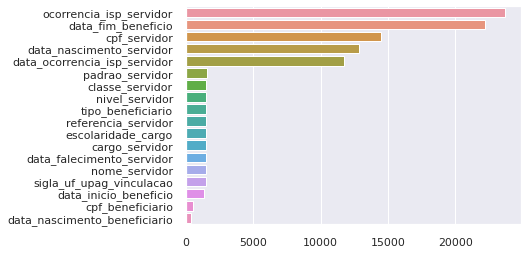

In [10]:
''' Verificando as colunas que mais possuem valores NaN '''
X=dataset.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)


In [11]:
#Todas variáveis do dataset
list(dataset)

['ano',
 'mes',
 'nome_servidor',
 'cpf_servidor',
 'data_nascimento_servidor',
 'data_falecimento_servidor',
 'matricula_servidor',
 'nome_orgao',
 'sigla_orgao',
 'codigo_orgao_superior',
 'cargo_servidor',
 'escolaridade_cargo',
 'classe_servidor',
 'padrao_servidor',
 'referencia_servidor',
 'nivel_servidor',
 'ocorrencia_isp_servidor',
 'data_ocorrencia_isp_servidor',
 'nome_beneficiario',
 'cpf_beneficiario',
 'data_nascimento_beneficiario',
 'sigla_uf_upag_vinculacao',
 'tipo_beneficiario',
 'tipo_pensao',
 'natureza_pensao',
 'data_inicio_beneficio',
 'data_fim_beneficio',
 'rendimento_bruto',
 'rendimento_liquido',
 'pagamento_suspenso']

In [12]:
'''Reduzindo a tabela '''
dataset2 = dataset.loc[:, dataset.columns.isin(['data_nascimento_servidor','data_falecimento_servidor','tipo_beneficiario','tipo_pensao','data_inicio_beneficio','data_fim_beneficio', 'escolaridade_cargo','rendimento_bruto',
 'rendimento_liquido','pagamento_suspenso'])]

In [42]:
dataset2.isnull().values.any() 

True

In [44]:
dataset2.isnull()

,data_nascimento_servidor,data_falecimento_servidor,escolaridade_cargo,tipo_beneficiario,tipo_pensao,data_inicio_beneficio,data_fim_beneficio,rendimento_bruto,rendimento_liquido,pagamento_suspenso
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
23743,False,False,False,False,False,False,True,False,False,False
23744,False,False,False,False,False,False,True,False,False,False
23745,False,False,False,False,False,False,True,False,False,False
23746,False,False,False,False,False,False,True,False,False,False


In [46]:
#Criar variável data atual 
dataAtual = 

In [ ]:
dataset2['data_fim_beneficio'].fillna( "dataAtual", inplace = True)

In [ ]:
dataset2.shape

In [ ]:
dataset2 = dataset2.dropna()

In [47]:
dataset2.shape

(23748, 10)

In [13]:
#Características do beneficiário
dataset2.tipo_beneficiario.value_counts()

VIUVA                                                 11286
FILHA MAIOR SOLTEIRA SEM CARGO PUBLICO PERMANENTE      8156
FILHO                                                   718
FILHA                                                   683
COMPANHEIRA(O)                                          429
FILHO MAIOR INVALIDO                                    327
FILHA MAIOR INVALIDA                                    111
MENOR DE 21 ANOS SOB GUARDA OU TUTELA                    91
COMPANHEIRO(A) DESIGNADO                                 82
VIUVO                                                    62
COMPANHEIRA/EX-COMPANHEIRA PA RECONHECIDA JUDICIAL       58
CONJUGE SEPARAD0 JUDICIALMENTE                           41
DESIGNADO MENOR 21 ANOS DEPENDENCIA ECONO.SERVIDOR       37
MAE                                                      36
FILHA VIUVA                                              34
FILHAS DESQUITADAS,SEPARADAS JUDIC. OU DIVORCIADAS       28
CONJUGE DIVORCIADO                      

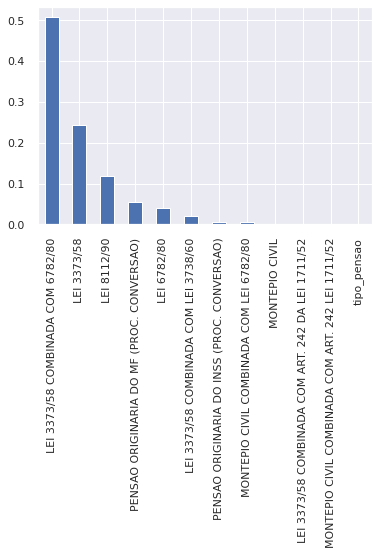

In [14]:
#Tipos, causas, motivações do benefício

dataset2['tipo_pensao'].value_counts(normalize=True).plot.bar()

In [20]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23748 entries, 0 to 23747
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ano                           23748 non-null  object
 1   mes                           23748 non-null  object
 2   nome_servidor                 22282 non-null  object
 3   cpf_servidor                  9243 non-null   object
 4   data_nascimento_servidor      10887 non-null  object
 5   data_falecimento_servidor     22282 non-null  object
 6   matricula_servidor            23748 non-null  object
 7   nome_orgao                    23748 non-null  object
 8   sigla_orgao                   23748 non-null  object
 9   codigo_orgao_superior         23748 non-null  object
 10  cargo_servidor                22282 non-null  object
 11  escolaridade_cargo            22282 non-null  object
 12  classe_servidor               22274 non-null  object
 13  padrao_servidor 

In [25]:
dataset2["data_nascimento_servidor"] = pd.to_datetime(dataset2["data_nascimento_servidor"])

ParserError: ignored

In [26]:
dataset2["data_falecimento_servidor"] = pd.to_datetime(dataset2["data_falecimento_servidor"])

ParserError: ignored

In [28]:
dataset2["data_inicio_beneficio"] = pd.to_datetime(dataset2["data_inicio_beneficio"])

ParserError: ignored

In [29]:
dataset2["data_fim_beneficio"] = pd.to_datetime(dataset2["data_fim_beneficio"])

ParserError: ignored

In [30]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23748 entries, 0 to 23747
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   data_nascimento_servidor   10887 non-null  object
 1   data_falecimento_servidor  22282 non-null  object
 2   escolaridade_cargo         22282 non-null  object
 3   tipo_beneficiario          22282 non-null  object
 4   tipo_pensao                23748 non-null  object
 5   data_inicio_beneficio      22440 non-null  object
 6   data_fim_beneficio         1532 non-null   object
 7   rendimento_bruto           23748 non-null  object
 8   rendimento_liquido         23748 non-null  object
 9   pagamento_suspenso         23748 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


In [31]:
#Agrupamento de benefício bruto por ano da data_inicio_beneficio
agrup_ano_bruto = dataset2.groupby(dataset2["data_inicio_beneficio"]).dataset2.year)["rendimento_bruto"].sum()

SyntaxError: ignored

In [ ]:
dataset2.groupby(dataset2["data_inicio_beneficio"]).dataset2.year)["rendimento_bruto"].sum().plot.bar

In [ ]:
#Agrupamento de benefício bruto por ano da data_inicio_liquido
agrup_ano_bruto = dataset2.groupby(dataset2["data_inicio_beneficio"]).dataset2.year)["rendimento_liquido"].sum()

In [ ]:
dataset2.groupby(dataset2["data_inicio_beneficio"]).dataset2.year)["rendimento_liquido"].sum().plot.bar

In [ ]:
#Renomeando Variáveis do Dataset
dataset2.rename(columns{x:y, z:a})

In [ ]:
'''Distribuição normalizada da variável X'''
sns.distplot(dataset2.X, fit = stats.norm);

In [ ]:
'''Reduzindo a tabela '''
dataset3 = dataset2.loc[:, dataset2.columns.isin(['valordapensao', 'idade' , 'escolaridade'])]

In [ ]:
##Há correlação entre valor da pensão, idade do trabalhador e escolaridade?
dataset3.corr()

In [ ]:
sns.heatmap( dataset3.corr (), annot = True )

In [ ]:
sns.scatterplot(data = dataset3, x = " ", y = " ")

In [ ]:
#Realizar um modelo de aprendizado de máquina para prever quais variáveis impactam no modelo de um benefício suspenso ('pagamento_suspenso')